#### 타이타닉 데이터를 활용한 승선자의 생사여부 예측
##### EDA를 활용한 Feature, Target 구성 여부 확인

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('../Data/train.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Age의 칼럼 선택 여부 확인 : 결측치가 20% 이상이면 해당 컬럼은 사용할 수 없다.
(len(train_df) - train_df.Age.count()) / len(train_df) * 100

np.float64(19.865319865319865)

In [6]:
# Age가 null인 컬럼과 null이 아닌 dataFrame으로 생성하기
age_null = train_df[train_df.Age.isnull()]
age_not_null = train_df[train_df.Age.notna()]
len(age_null) + len(age_not_null)

891

In [7]:
# Survived와 Pclass 기준으로 Dataset 정렬 : 정렬 후, index 재정리 필요
train_df = train_df.sort_values(by=['Survived','Pclass']).reset_index(drop=True)

In [8]:
train_df.shape
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


In [9]:
# Survived 기준으로 생존과 사망의 Count 확인
print(f'사망자 수 : {train_df[train_df.Survived == 0].shape[0]}') # 사망자 수
print(f'생존자 수 : {train_df[train_df.Survived == 1].shape[0]}') # 생존자 수

사망자 수 : 549
생존자 수 : 342


In [10]:
342/549

0.6229508196721312

In [11]:
# 생존과 사망의 DataFrame 만들기
result = [train_df[train_df.Survived == 0].shape[0], train_df[train_df.Survived == 1].shape[0]]

live_death = pd.DataFrame(
    {
        'Result' : result
    },
    index = ['사망', '생존']
)

live_death

,Result
사망,549
생존,342


In [12]:
# Pie Chart
import matplotlib.pyplot as plt
import koreanize_matplotlib

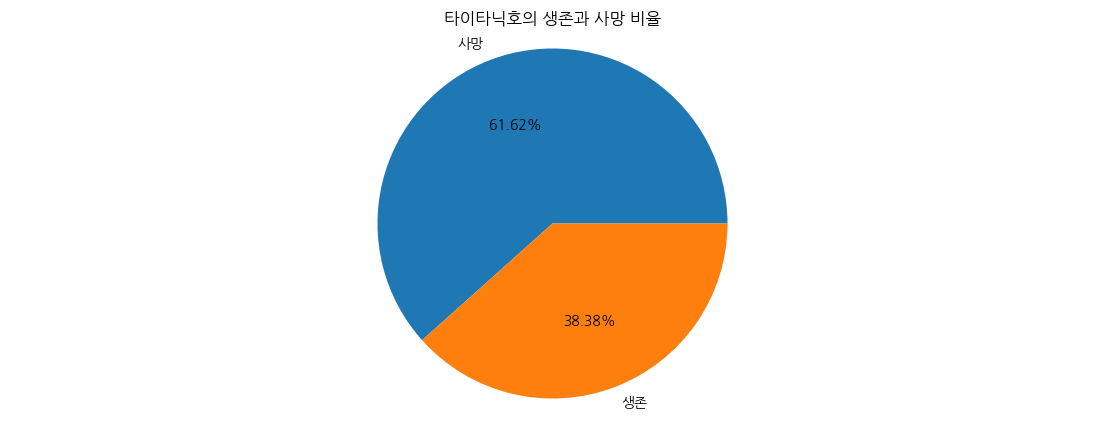

In [13]:
plt.figure(figsize= (14, 5))

live_death.Result.plot(
    kind= 'pie',
    autopct= '%.2f%%'
)

plt.title('타이타닉호의 생존과 사망 비율')
plt.axis('equal')
plt.ylabel('')

plt.show()

---
#### Feature 컬럼 선택

In [14]:
train_df.head()
# 쉬운 데이터 = 결측치 없고 분류하기 쉬워야 함. =>  성별, pclass
# target의 비율은 1:1, Feature의 비율은 차이가 나야함. 1:1은 x 구분할 수 없음.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


##### Sex컬럼이 Feature로 적합한지 확인
: null도 없고 category 개수도 적다.

In [15]:
train_df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [16]:
314 / 577

0.5441941074523396

> 남성의 승선수가 여성의 승선수보다 거의 2배이다.   
Feature는 차이가 특성이 필요한데, 일단 승선수만 보면 Feature로 사용할 수 있을 것 같다.

#### Target 컬럼과 연결하여 Feature가 될 수 있는지 확인

In [ ]:
# 여성의 생존과 사망 수
female_survived = train_df[(train_df.Sex == 'female') & (train_df.Survived == 1)].shape[0]
female_death = train_df[(train_df.Sex == 'female') & (train_df.Survived == 0)].shape[0]

print(f"여성의 생존 수는 {female_survived}이고, 사망 수는 {female_death}이다.")

여성의 생존 수는 233이고, 사망 수는 81이다.


In [ ]:
# 남성의 생존과 사망 수
male_survived = train_df[(train_df.Sex == 'male') & (train_df.Survived == 1)].shape[0]
male_death = train_df[(train_df.Sex == 'male') & (train_df.Survived == 0)].shape[0]

print(f"남성의 생존 수는 {male_survived}이고, 사망 수는 {male_death}이다.")

남성의 생존 수는 109이고, 사망 수는 468이다.


> 여성과 남성의 생존 여부를 연결하여 특징을 보았는데 성별로 정반대의 특징이 나타난다.   
Sex컬럼은 Feature로서 충분하다.

---
#### Pclass의 Feature 확인

In [19]:
# Pclass의 Category 분포 확인
train_df.Pclass.value_counts().sort_index()

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

> 객실의 등급별 인원수로 보아 1, 2등급은 크게 차이나지 않지만, 1과 3 그리고 2와 3은 차이가 있어 Feature의 가능성이 보임

#### [Survived] <-> [Sex, Pclass 확인]

In [20]:
# 1등 객실의 여성 생존율
female_count = train_df[(train_df.Sex == 'female') & (train_df.Pclass == 1)].shape[0]
female_live = train_df[(train_df.Sex == 'female') & (train_df.Pclass == 1) & (train_df.Survived == 1)].shape[0]
print(f"1등 객실의 여성의 생존율은 {female_live} / {female_count}로 {round(female_live/female_count*100)}% 이다.")

1등 객실의 여성의 생존율은 91 / 94로 97% 이다.


In [ ]:
# 1, 2, 3등 객실의 여성 생존율 (내 풀이)

# num = [1, 2, 3]
# for i in num:
#     female_count = train_df[(train_df.Sex == 'female') & (train_df.Pclass == i)].shape[0]
#     female_live = train_df[(train_df.Sex == 'female') & (train_df.Pclass == i) & (train_df.Survived == 1)].shape[0]
#     print(f"{i}등 객실의 여성의 생존율은 {female_live} / {female_count}로 {round(female_live/female_count*100)}% 이다.")

1등 객실의 여성의 생존율은 91 / 94로 97% 이다.
2등 객실의 여성의 생존율은 70 / 76로 92% 이다.
3등 객실의 여성의 생존율은 72 / 144로 50% 이다.


In [72]:
# 1, 2, 3등 객실의 여성 생존율
for i in train_df.Pclass.unique():
    female_count = train_df[(train_df.Sex == 'female') & (train_df.Pclass == i)].shape[0]
    female_live = train_df[(train_df.Sex == 'female') & (train_df.Pclass == i) & (train_df.Survived == 1)].shape[0]
    print(f"{i}등 객실의 여성의 생존율은 {female_live} / {female_count}로 {round(female_live/female_count*100)}% 이다.")

1등 객실의 여성의 생존율은 91 / 94로 97% 이다.
2등 객실의 여성의 생존율은 70 / 76로 92% 이다.
3등 객실의 여성의 생존율은 72 / 144로 50% 이다.


In [62]:
# 1, 2, 3등 객실의 여성과 남성의 생존율

for gender in train_df.Sex.unique():
    for i in train_df.Pclass.unique():
        female_count = train_df[(train_df.Sex == gender) & (train_df.Pclass == i)].shape[0]
        female_live = train_df[(train_df.Sex == gender) & (train_df.Pclass == i) & (train_df.Survived == 1)].shape[0]
        print(f"{i}등 객실의 {'남성' if gender == 'male' else '여성'}의 생존율은 {female_live} / {female_count:>3}로 {round(female_live/female_count*100, 2):0^5}% 이다.")
    print('-' * 50)

1등 객실의 남성의 생존율은 45 / 122로 36.89% 이다.
2등 객실의 남성의 생존율은 17 / 108로 15.74% 이다.
3등 객실의 남성의 생존율은 47 / 347로 13.54% 이다.
--------------------------------------------------
1등 객실의 여성의 생존율은 91 /  94로 96.81% 이다.
2등 객실의 여성의 생존율은 70 /  76로 92.11% 이다.
3등 객실의 여성의 생존율은 72 / 144로 50.00% 이다.
--------------------------------------------------


#### [Survived] <- [Sex, Pclass]로 결정

In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


In [26]:
train_df.Embarked.unique()

<StringArray>
['S', 'C', 'Q', nan]
Length: 4, dtype: str

In [27]:
# NaN인 데이터 찾기
train_df[train_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
556,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
672,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [28]:
# 항구별 승선 인원
train_df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

> nan -> S

In [29]:
train_df.loc[train_df.Embarked.isnull(), 'Embarked'] = 'S'
train_df.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [30]:
# 항구별 성별 승선 인원
train_df.groupby(
    ['Embarked', 'Sex']
).size()

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    205
          male      441
dtype: int64

In [31]:
# 항구별 생존 인원
train_df.groupby(
    ['Embarked', 'Survived']
).size()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
dtype: int64

In [32]:
# 항구별 객실등급 인원
train_df.groupby(
    ['Embarked', 'Pclass']
).size()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         129
          2         164
          3         353
dtype: int64

---
#### [Survived] <- [Sex, Pclass, Embarked]

In [33]:
train = train_df[['Survived', 'Sex', 'Pclass', 'Embarked']]
train.head()

,Survived,Sex,Pclass,Embarked
0,0,male,1,S
1,0,male,1,S
2,0,male,1,C
3,0,male,1,C
4,0,male,1,S


In [34]:
# Sex컬럼을 SexCode로 숫자화 시킨다.
train.loc[train.Sex == 'female', 'SexCode'] = 0
train.loc[train.Sex == 'male', 'SexCode'] = 1
train.head()

,Survived,Sex,Pclass,Embarked,SexCode
0,0,male,1,S,1.0
1,0,male,1,S,1.0
2,0,male,1,C,1.0
3,0,male,1,C,1.0
4,0,male,1,S,1.0


In [35]:
train.tail()

,Survived,Sex,Pclass,Embarked,SexCode
886,1,male,3,S,1.0
887,1,female,3,S,0.0
888,1,female,3,C,0.0
889,1,male,3,S,1.0
890,1,female,3,C,0.0


In [36]:
# Sex컬럼 삭제
del train['Sex']
train.head()

,Survived,Pclass,Embarked,SexCode
0,0,1,S,1.0
1,0,1,S,1.0
2,0,1,C,1.0
3,0,1,C,1.0
4,0,1,S,1.0


In [38]:
# One-hot-encoding으로 Embarked 정리
train_ml = \
    pd.get_dummies(
        data= train,
        columns= ['Embarked']
    )
train_ml.head()

,Survived,Pclass,SexCode,Embarked_C,Embarked_Q,Embarked_S
0,0,1,1.0,False,False,True
1,0,1,1.0,False,False,True
2,0,1,1.0,True,False,False
3,0,1,1.0,True,False,False
4,0,1,1.0,False,False,True


---
#### RandomForest로 예측 확인

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [49]:
# Train과 Test 분리
train_data, test_data, train_target, test_target = train_test_split(
    train_ml.loc[:, 'Pclass':],
    train_ml['Survived'],
    random_state= 42,
    stratify= train_ml['Survived']
)

In [50]:
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(668, 5)
(223, 5)
(668,)
(223,)


In [51]:
# 데이터 학습시키고 예측하기
clf = RandomForestClassifier()
clf.fit(train_data, train_target)
print('Train :', clf.score(train_data, train_target))
print('Test :', clf.score(test_data, test_target))

Train : 0.8053892215568862
Test : 0.8295964125560538


In [52]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score

In [53]:
pred = clf.predict(test_data)

In [54]:
accuracy_score(test_target, pred)

0.8295964125560538

In [55]:
conf_matrix = confusion_matrix(test_target, pred)
conf_matrix

array([[131,   6],
       [ 32,  54]])

In [56]:
print('사망 :', 131/(131+6))
print('생존 :', 54/(32+54))

사망 : 0.9562043795620438
생존 : 0.627906976744186


#### Cross Validation

In [57]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(
    clf,
    train_ml.loc[:, 'Pclass':],
    train_ml['Survived'],
    cv= 5,
    scoring= 'accuracy'
)
scores

array([0.54189944, 0.83707865, 0.89325843, 0.76966292, 0.64606742])

In [60]:
scores.mean()

np.float64(0.737593371414224)

---
---

In [115]:
train_df.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
53.00     1
80.00     1
0.67      1
12.00     1
0.42      1
Name: count, Length: 88, dtype: int64

In [116]:
train_df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [117]:
age = train_df.Age.unique()

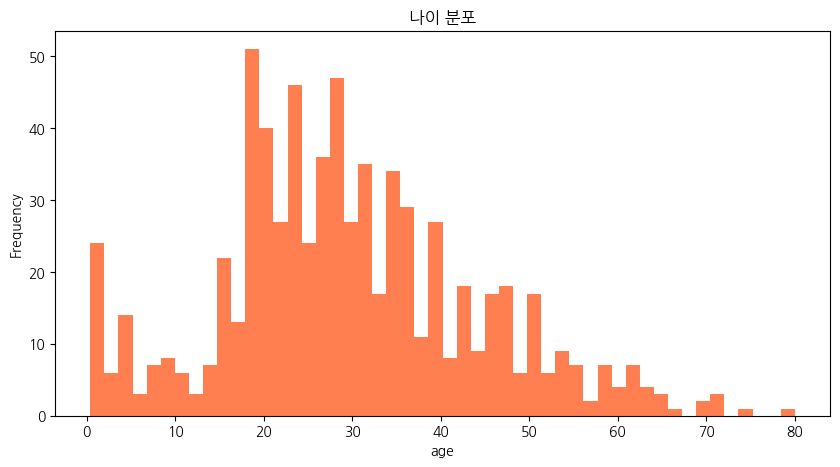

In [118]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

train_df.Age.plot(
    kind= 'hist',
    figsize= (10, 5),
    color= 'coral',
    bins= 50 # 등분(세분화)
)

plt.title('나이 분포')
plt.xlabel('age')

plt.show()

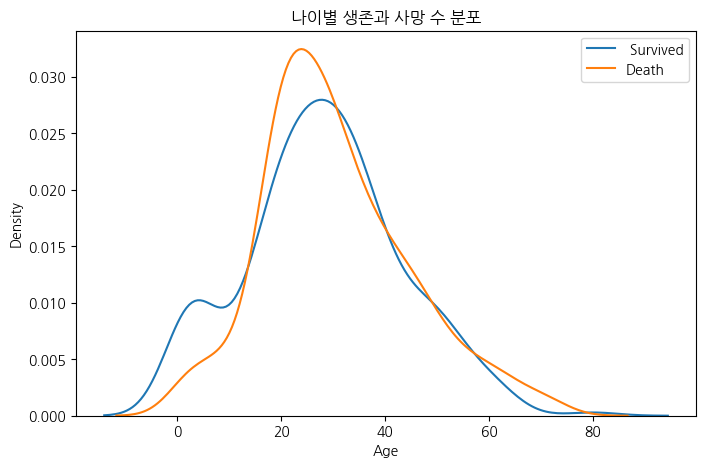

In [119]:
import seaborn as sns

# 나이별 생존과 사망 수 추출
survived = train_df[train_df.Survived == 1]
death = train_df[train_df.Survived == 0]

# 시각화
plt.figure(figsize=(8, 5))

sns.kdeplot(data= survived, x= 'Age', label=' Survived')
sns.kdeplot(data= death, x= 'Age', label= 'Death')

plt.title('나이별 생존과 사망 수 분포')
plt.legend()
plt.show()

In [120]:
# 나이 그룹화
age_0_20 = train_df[train_df.Age.between(0, 20, inclusive="left")]

age_20_40 = train_df[train_df.Age.between(20, 40, inclusive="left")]

age_40_60 = train_df[train_df.Age.between(40, 60, inclusive="left")]

age_60_80 = train_df[train_df.Age.between(60, 80, inclusive="left")]

age_80_plus = train_df[train_df.Age >= 80]

In [121]:
# 나이별 생존과 사망 수
age_names = ['0~20', '20~40', '40~60', '60~80', '80+']
age_list = [age_0_20, age_20_40, age_40_60, age_60_80, age_80_plus]

for name, age in zip(age_names, age_list):
    survived = age[age['Survived'] == 1].shape[0]
    death = age[age['Survived'] == 0].shape[0]

    print(f"{name:>5}세  →  생존: {survived:>3}명, 사망: {death:>3}명")

 0~20세  →  생존:  79명, 사망:  85명
20~40세  →  생존: 150명, 사망: 237명
40~60세  →  생존:  54명, 사망:  83명
60~80세  →  생존:   6명, 사망:  19명
  80+세  →  생존:   1명, 사망:   0명
